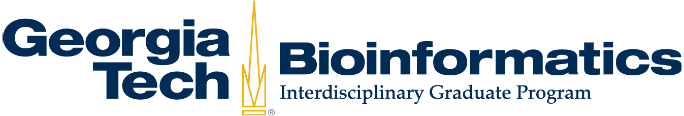

<div class="alert alert-block alert-info">
    <h1>BIOS 4150/BIOL 6150</h1>
    <h3>Instructor: Dr. King Jordan</h3>
    <p>TAs: Shivam Sharma (shivamsharma13@gatech.edu) & Vishva Natarajan (vishvanata@gatech.edu)</p>
</div>

<div class="alert alert-block alert-warning">
    <h3>Project 7: <i>Introduction to single cell gene expression analysis</i></h3>
    <h4>Deadline: 5:30PM, December 13th, 2023</h4>
    <h4>Total Points: 300</h4>
    
</div>

<div class="alert alert-block alert-danger">
    <h3>Alert!</h3>
    <p>Do not delete any comments or information boxes the starter notebook comes with</p>
</div>

<div class="alert alert-block alert-info">
    <h2>Please folow the following guidelines:</h2>
    <p>1. You can use PACE RStudio for this project, but please bring this analysis code to the jupyter notebook for submission. (Write your R code in the cells of this notebook with appropriate comments).</p>
    <p>2. Figures are the most important aspect of this project, so please download (from PACE RStudio) and show you result figures in this jupyter notebook using markdown.</p>
    <p>3. This project will focus on a simple analysis of a single cell gene expression dataset. The sections are divided broadly, so please explain your work in as much detail as possible.</p>
</div>

---

# **1. Reading the data**
### *Total Questions: 1*
### *Total Points: 50*


---

<div class="alert alert-block alert-warning">
    <h3>1. Locate and read the data</h3>
    <p>We have raw data files in: /storage/ice-shared/biol6150/Data/SingleCell/ProjectDataset/. Read this data using Seurat and get ready for QC</p> 
</div>

In [3]:
### Add cells for R code, comments and figures (using markdown) to keep in mind.

R codes executed in "Project7-SingleCellGeneExpressionRcode.R" file

library(dplyr)

install.packages("Seurat")

install.packages("hdf5r")

library(Seurat)

library(hdf5r)

#hdf5r package was needed to read this data file

install.packages("patchwork")

library(patchwork)

pbmc.data <-Read10X_h5("~/biol6150/Data/SingleCell/ProjectDataset/10k_PBMC_3p_nextgem_Chromium_X_intron_raw_feature_bc_matrix.h5")

pbmc <- CreateSeuratObject(counts = pbmc.data, project = "pbmc3k", min.cells = 3, min.features = 200)


The data is loaded first
Seurat object named "pbmc" is created using the "CreateSeuratObject" function. It hasinformation about the single cell RNA-seq data.
There is 27366 features across 12170 samples within 1 assay

# **2. Quality control**
### *Total Questions: 1*
### *Total Points: 100*


---

<div class="alert alert-block alert-warning">
    <h3>2. QC and normalization</h3>
    <p>Perform QC, normalization and feature selection on this dataset. Show your feature selection scatter plot in this notebook (and any other figures you create along the way)</p>
</div>

In [14]:
### Add cells for R code, comments and figures (using markdown) to keep in mind.

Here we assess the quality of cells based on the percentage of mitochondrial gene expression.

pbmc[["percent.mt"]] <- PercentageFeatureSet(pbmc, pattern = "^MT-")

VlnPlot(pbmc, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

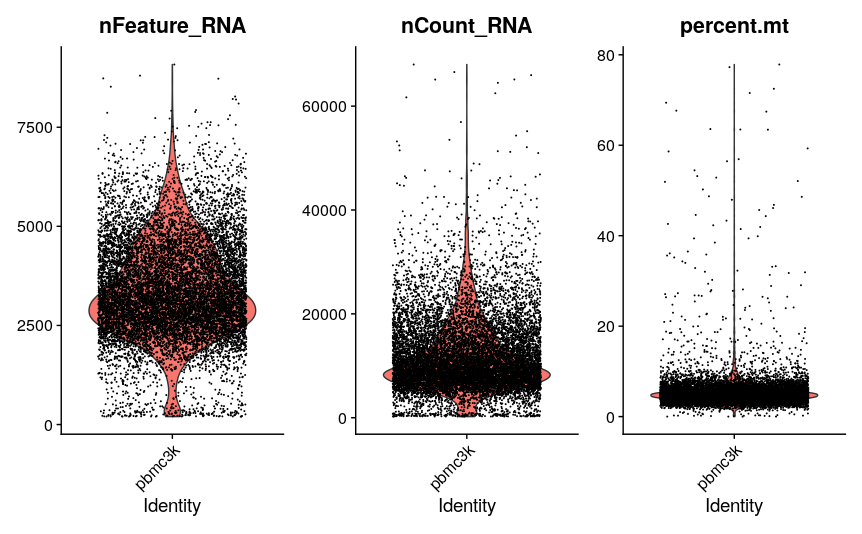

plot1 <- FeatureScatter(pbmc, feature1 = "nCount_RNA", feature2 = "percent.mt")

plot2 <- FeatureScatter(pbmc, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")

plot1 + plot2

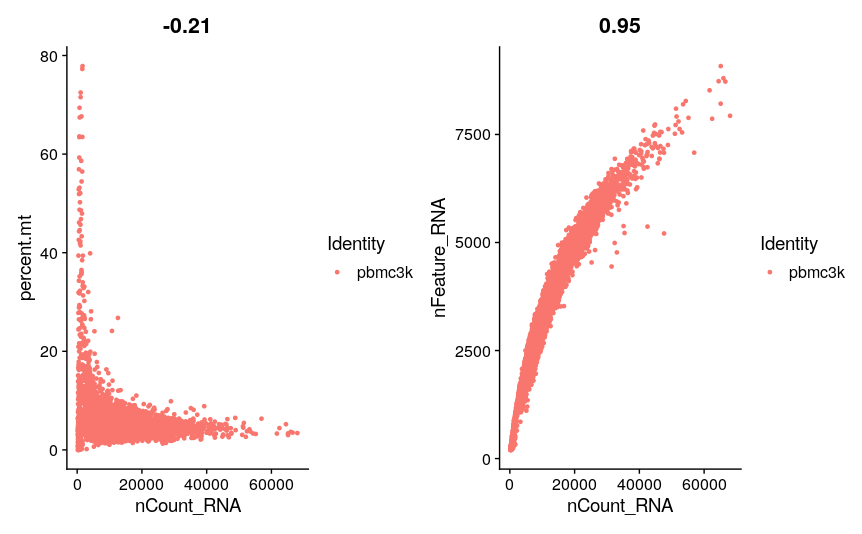

#Pruning

pbmc <- subset(pbmc, subset = nFeature_RNA > 200 & nFeature_RNA < 2500 & percent.mt < 5)

#Normalization\
#method “LogNormalize” that normalizes the feature expression measurements for each cell by the total expression,<br /> 
#multiplies this by a scale factor (10,000 by default), and log-transforms the result. 

pbmc <- NormalizeData(pbmc, normalization.method = "LogNormalize", scale.factor = 10000)

#Feature selection<br /> 
#highly expressed in some cells, and lowly expressed in others<br /> 
#models on mean-variance relationship inherent in single-cell data<br /> 
pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 2000)

#Identify the 10 most highly variable genes<br /> 
top10 <- head(VariableFeatures(pbmc), 4)

#plot variable features with and without labels<br /> 
plot1 <- VariableFeaturePlot(pbmc)<br /> 
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)<br /> 
plot1 + plot2

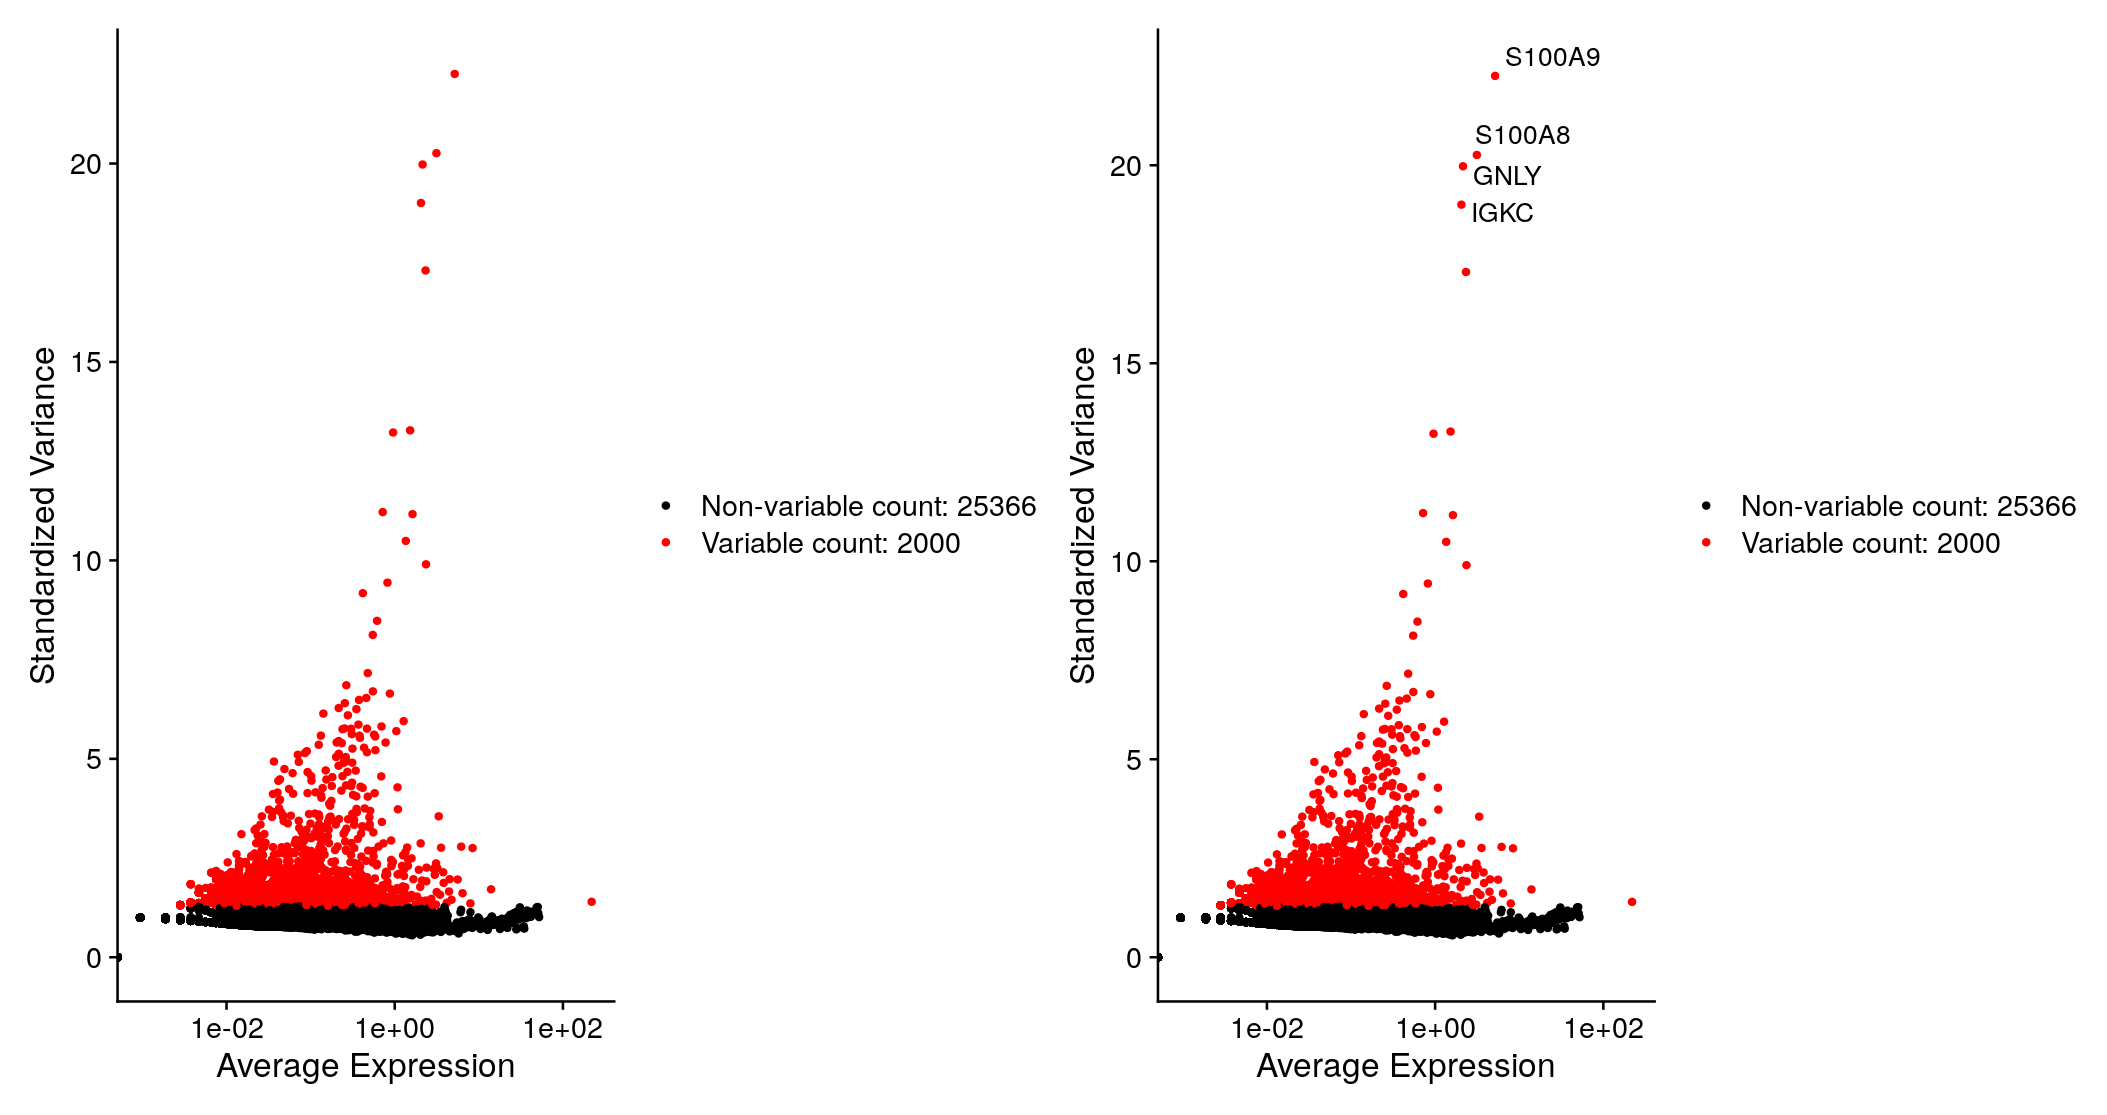

# **3. Dimensionality reduction and clustering**
### *Total Questions: 2*
### *Total Points:  50+50 = 100*


---

<div class="alert alert-block alert-warning">
    <h3>3.1 Can you see any clusters in your data?</h3>
    <p>1. Plot your PCA</p>
    <p>1. Plot your UMAP</p>
</div>

In [6]:
### Add cells for R code, comments and figures (using markdown) to keep in mind.

#Scaling the data. (linear transformation)

#Shifts the expression of each gene, so that the mean expression across cells is 0

#Scales the expression of each gene, so that the variance across cells is 1

#This step gives equal weight in downstream analyses, so that highly-expressed genes do not dominate

all.genes <- rownames(pbmc)

pbmc <- ScaleData(pbmc, features = all.genes)


#PCA

pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc))

#Check if cells cluster in PCA?

DimPlot(pbmc, reduction = "pca") + NoLegend()

#Clustering and visualization.

pbmc <- RunUMAP(pbmc, dims = 1:10)

DimPlot(pbmc, reduction = "umap")

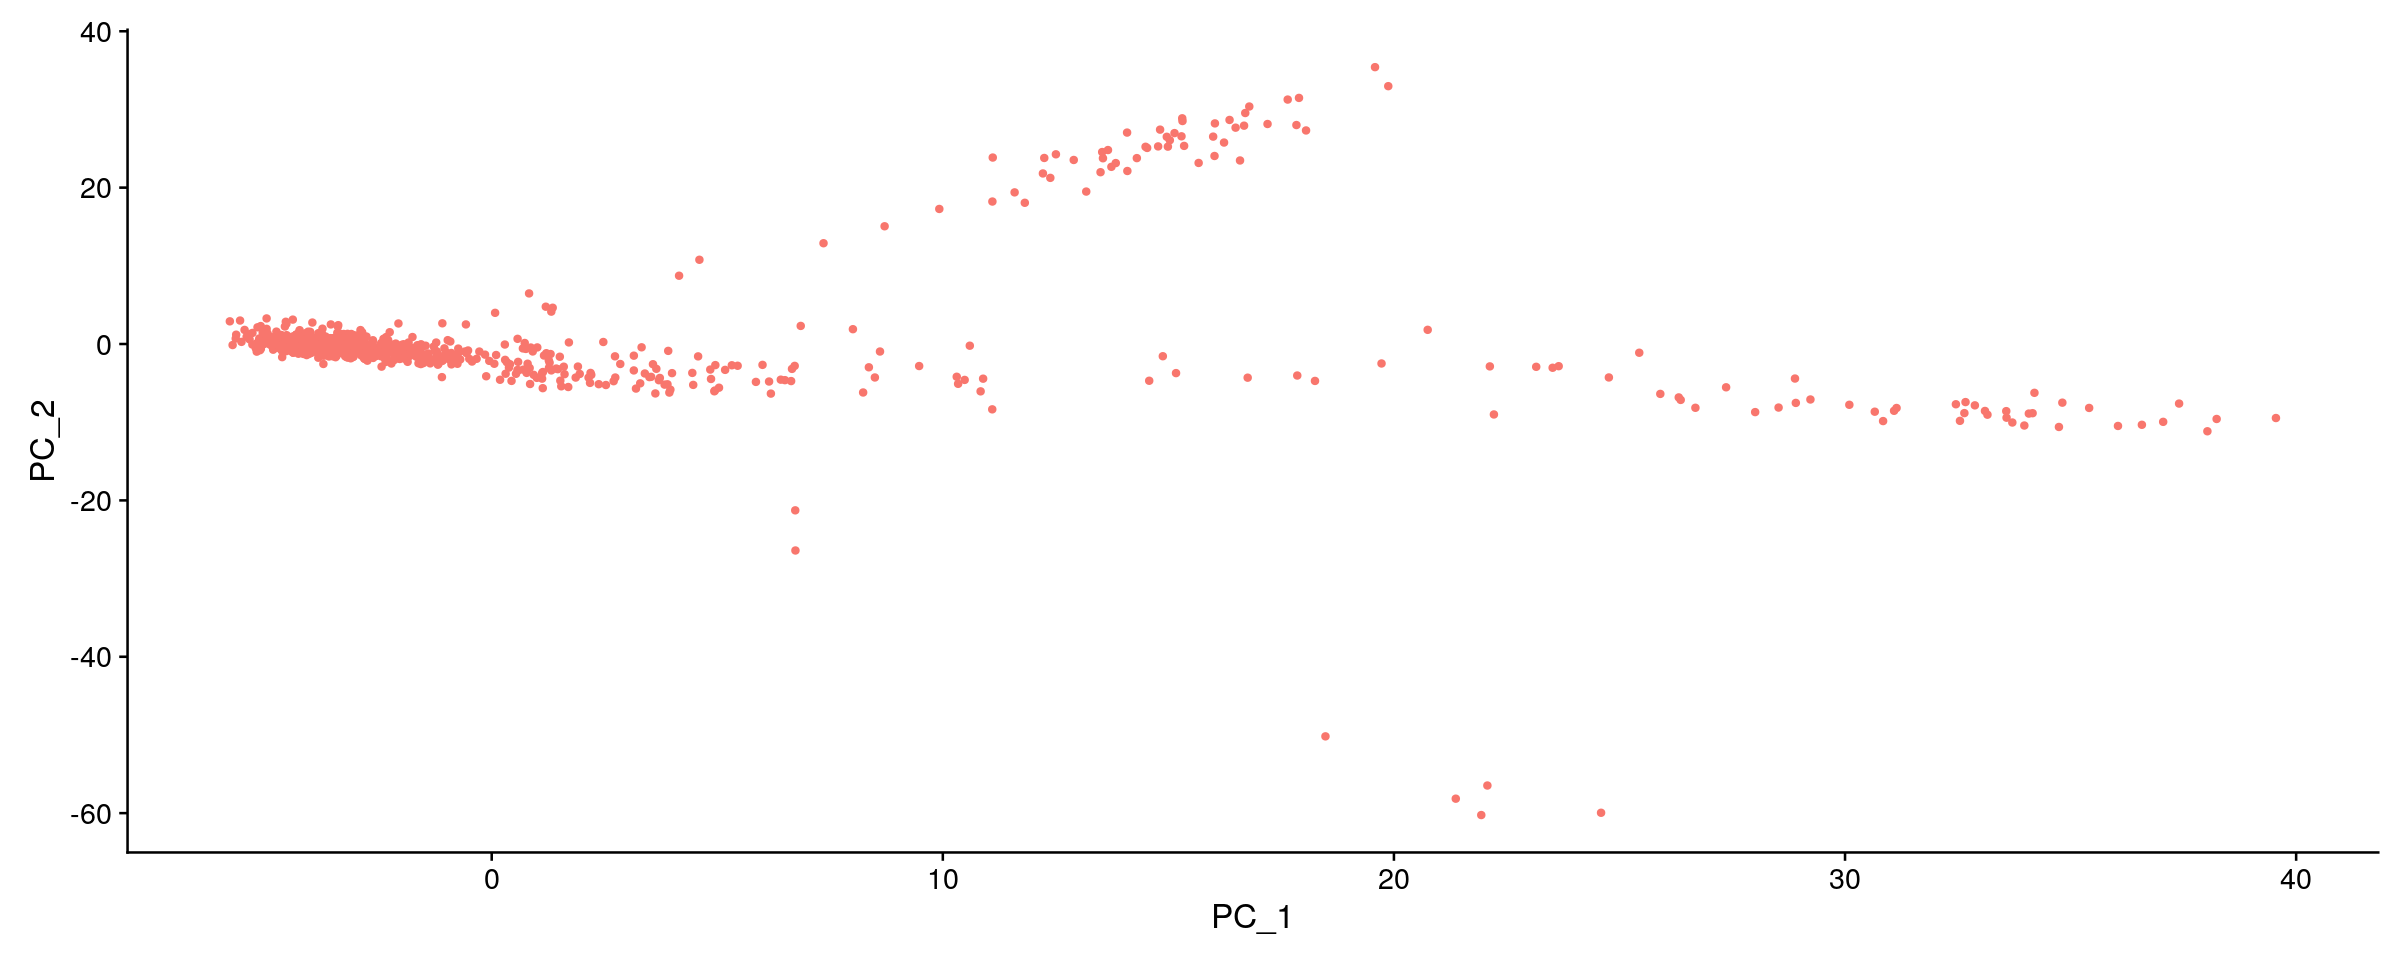


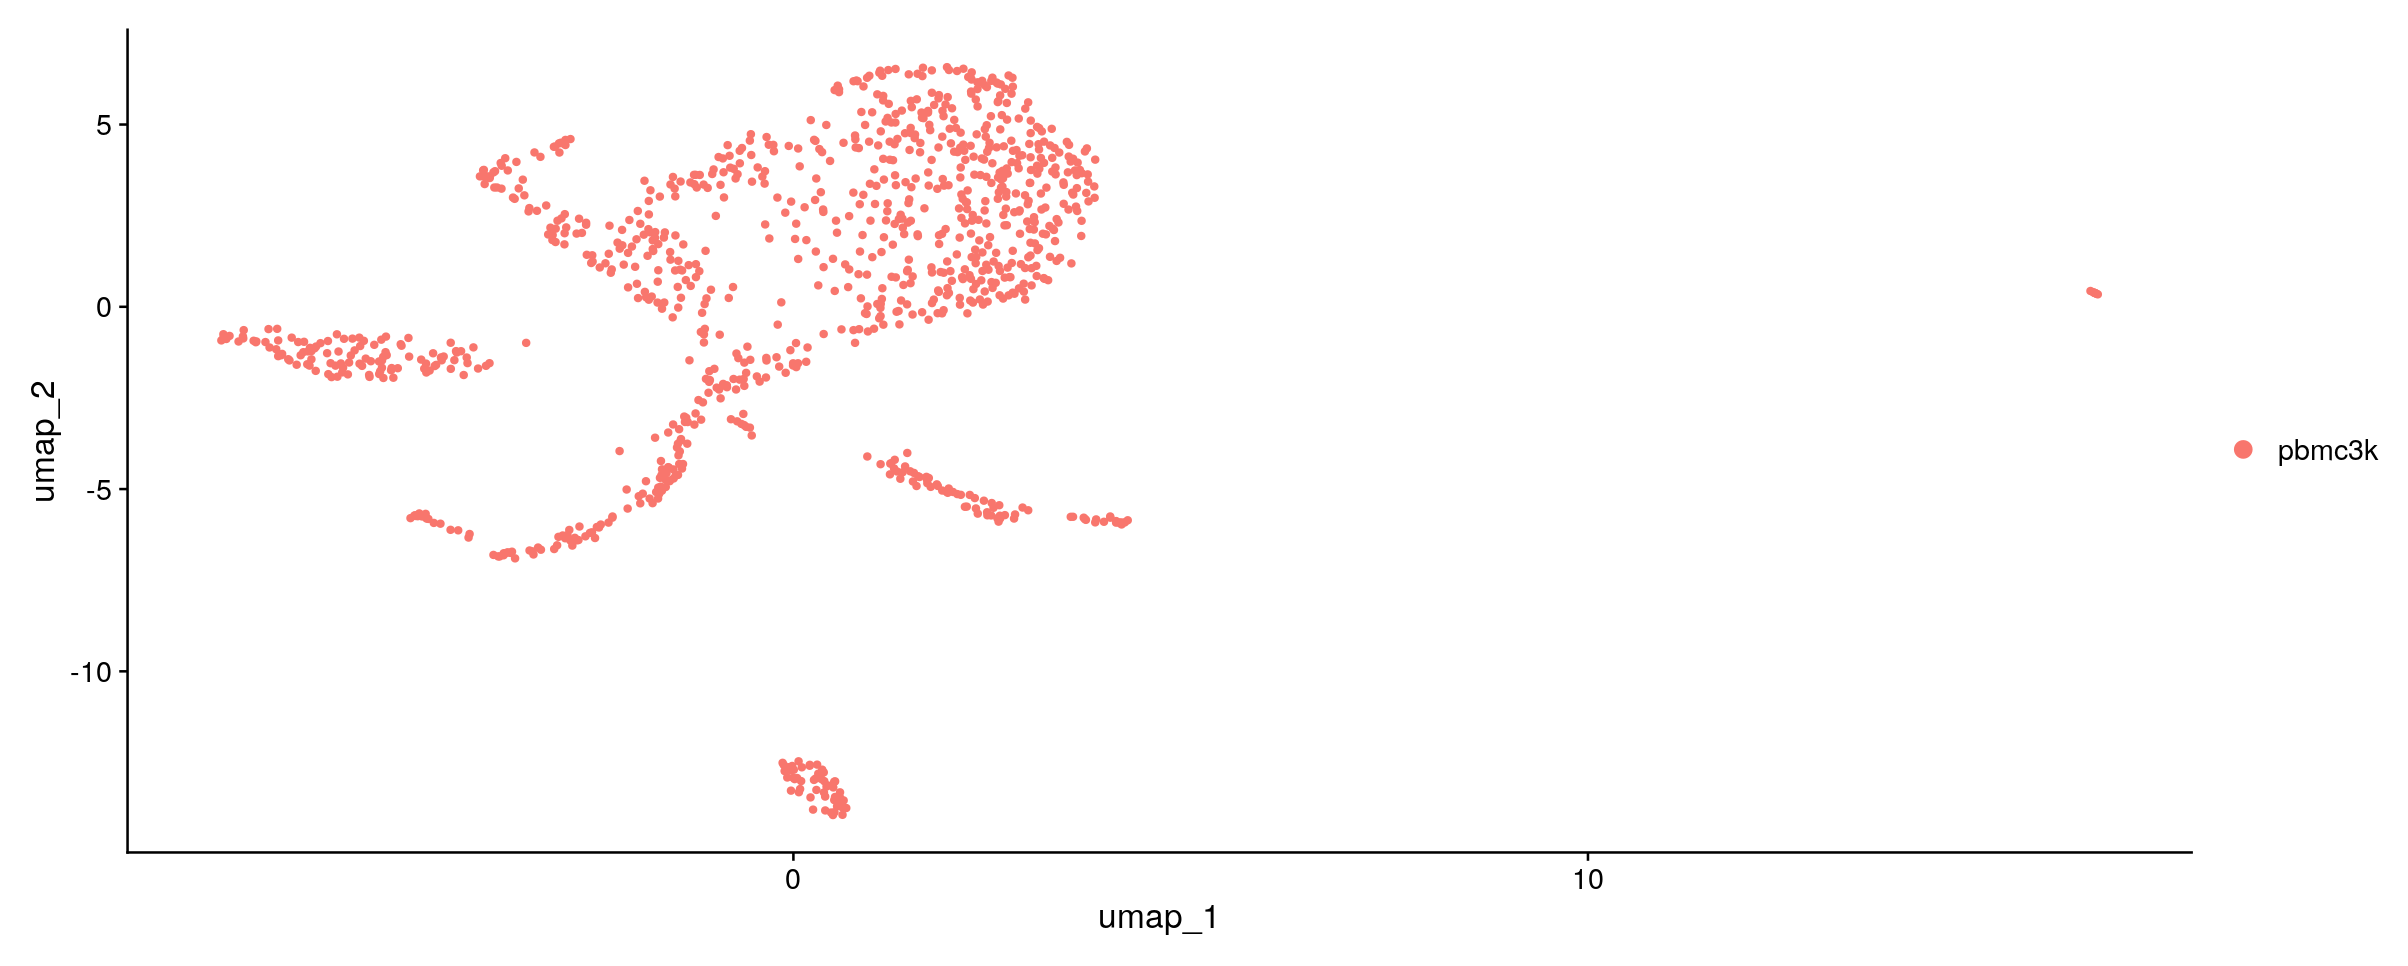

No clustering visible from these plots.

<div class="alert alert-block alert-warning">
    <h3>3.2 Perform clustering of cells using graph based clustering approach as implemented in Seurat's tutorial.</h3>
    <p>1. Plot your PCA (show clusters this time)</p>
    <p>1. Plot your UMAP (show clusters this time)</p>
</div>

In [ ]:
### Add cells for R code, comments and figures (using markdown) to keep in mind.

#Clustering using a graph based approach: KNN-graph.

pbmc <- FindNeighbors(pbmc, dims = 1:10)

pbmc <- FindClusters(pbmc, resolution = 0.5)

pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc))

DimPlot(pbmc, reduction = "pca") + NoLegend()

pbmc <- RunUMAP(pbmc, dims = 1:10)

DimPlot(pbmc, reduction = "umap")

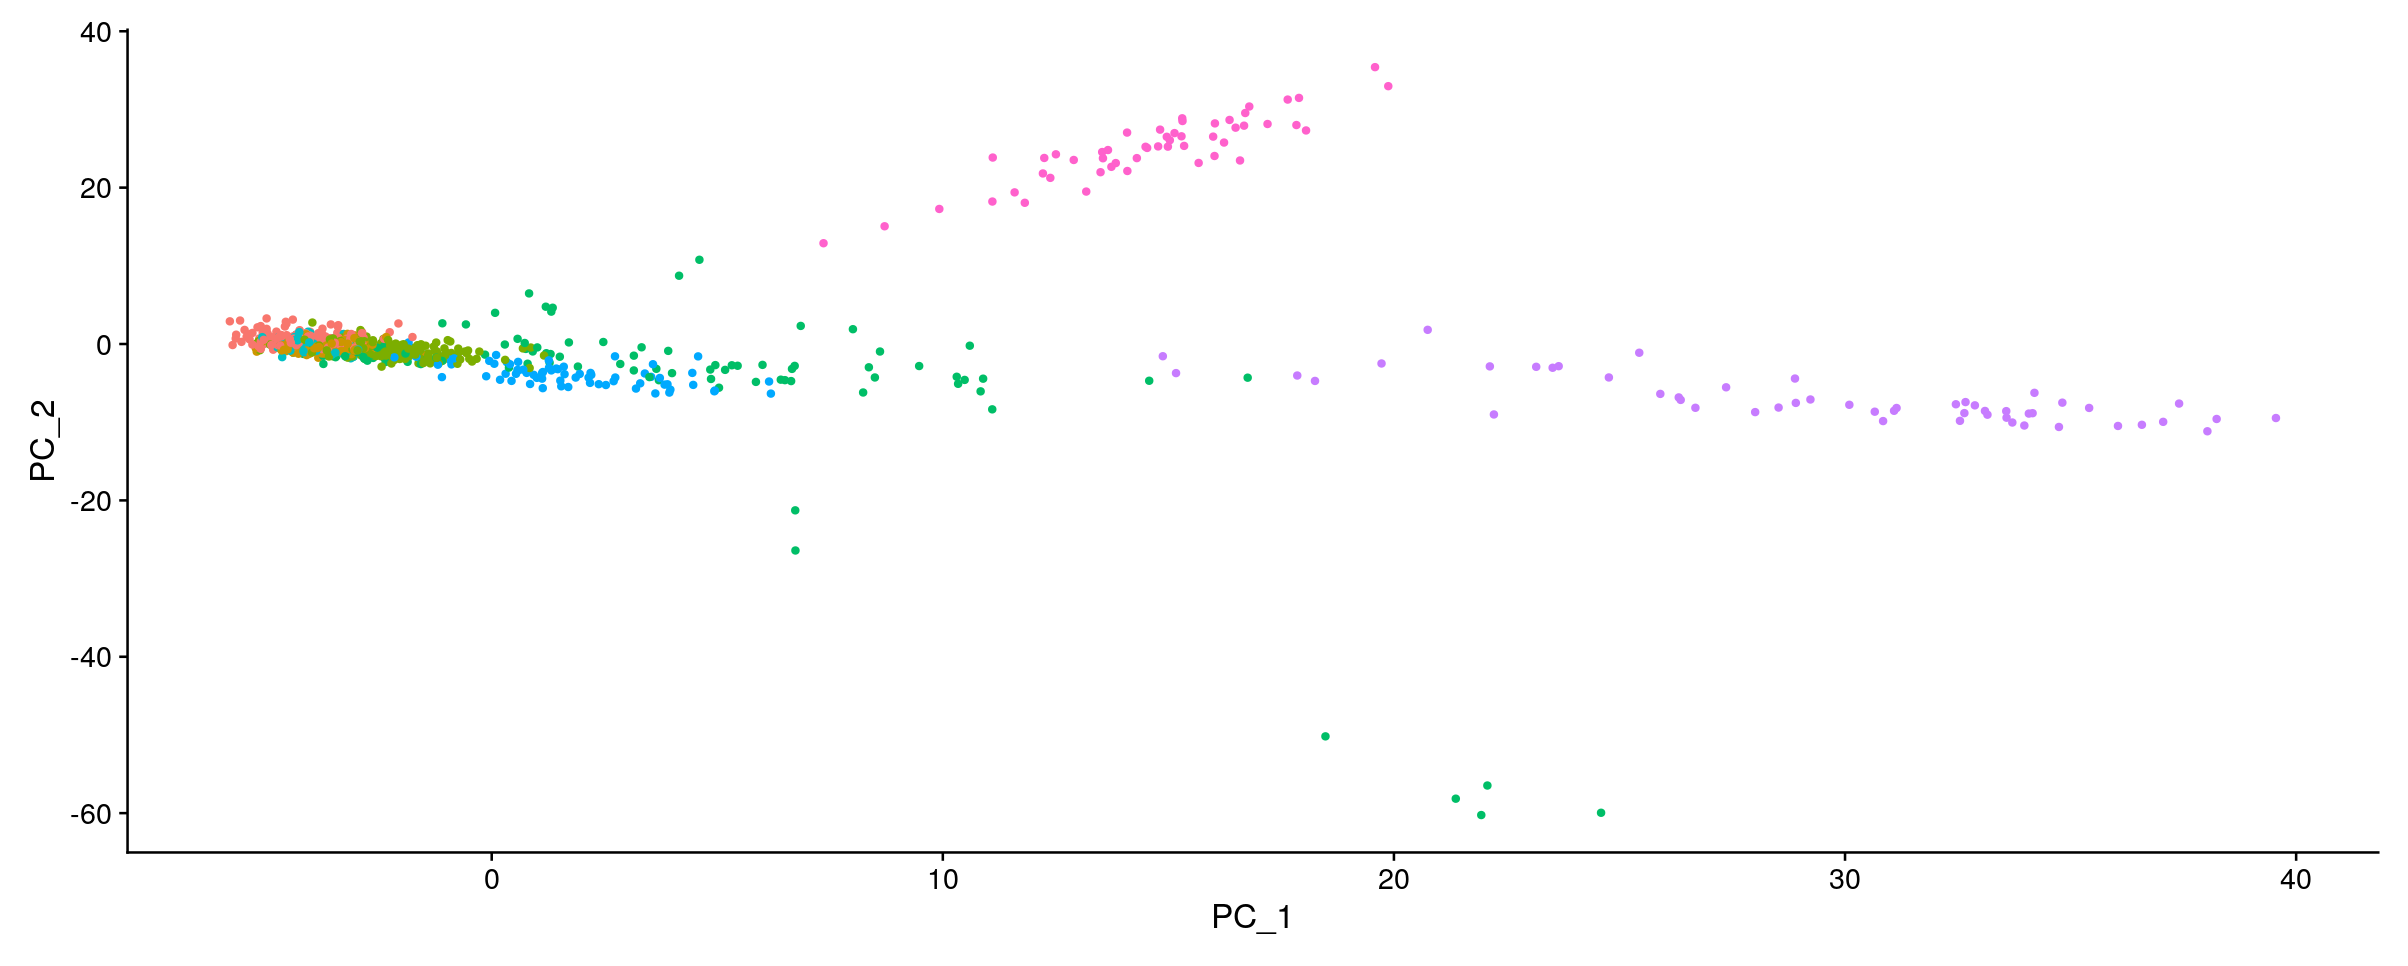

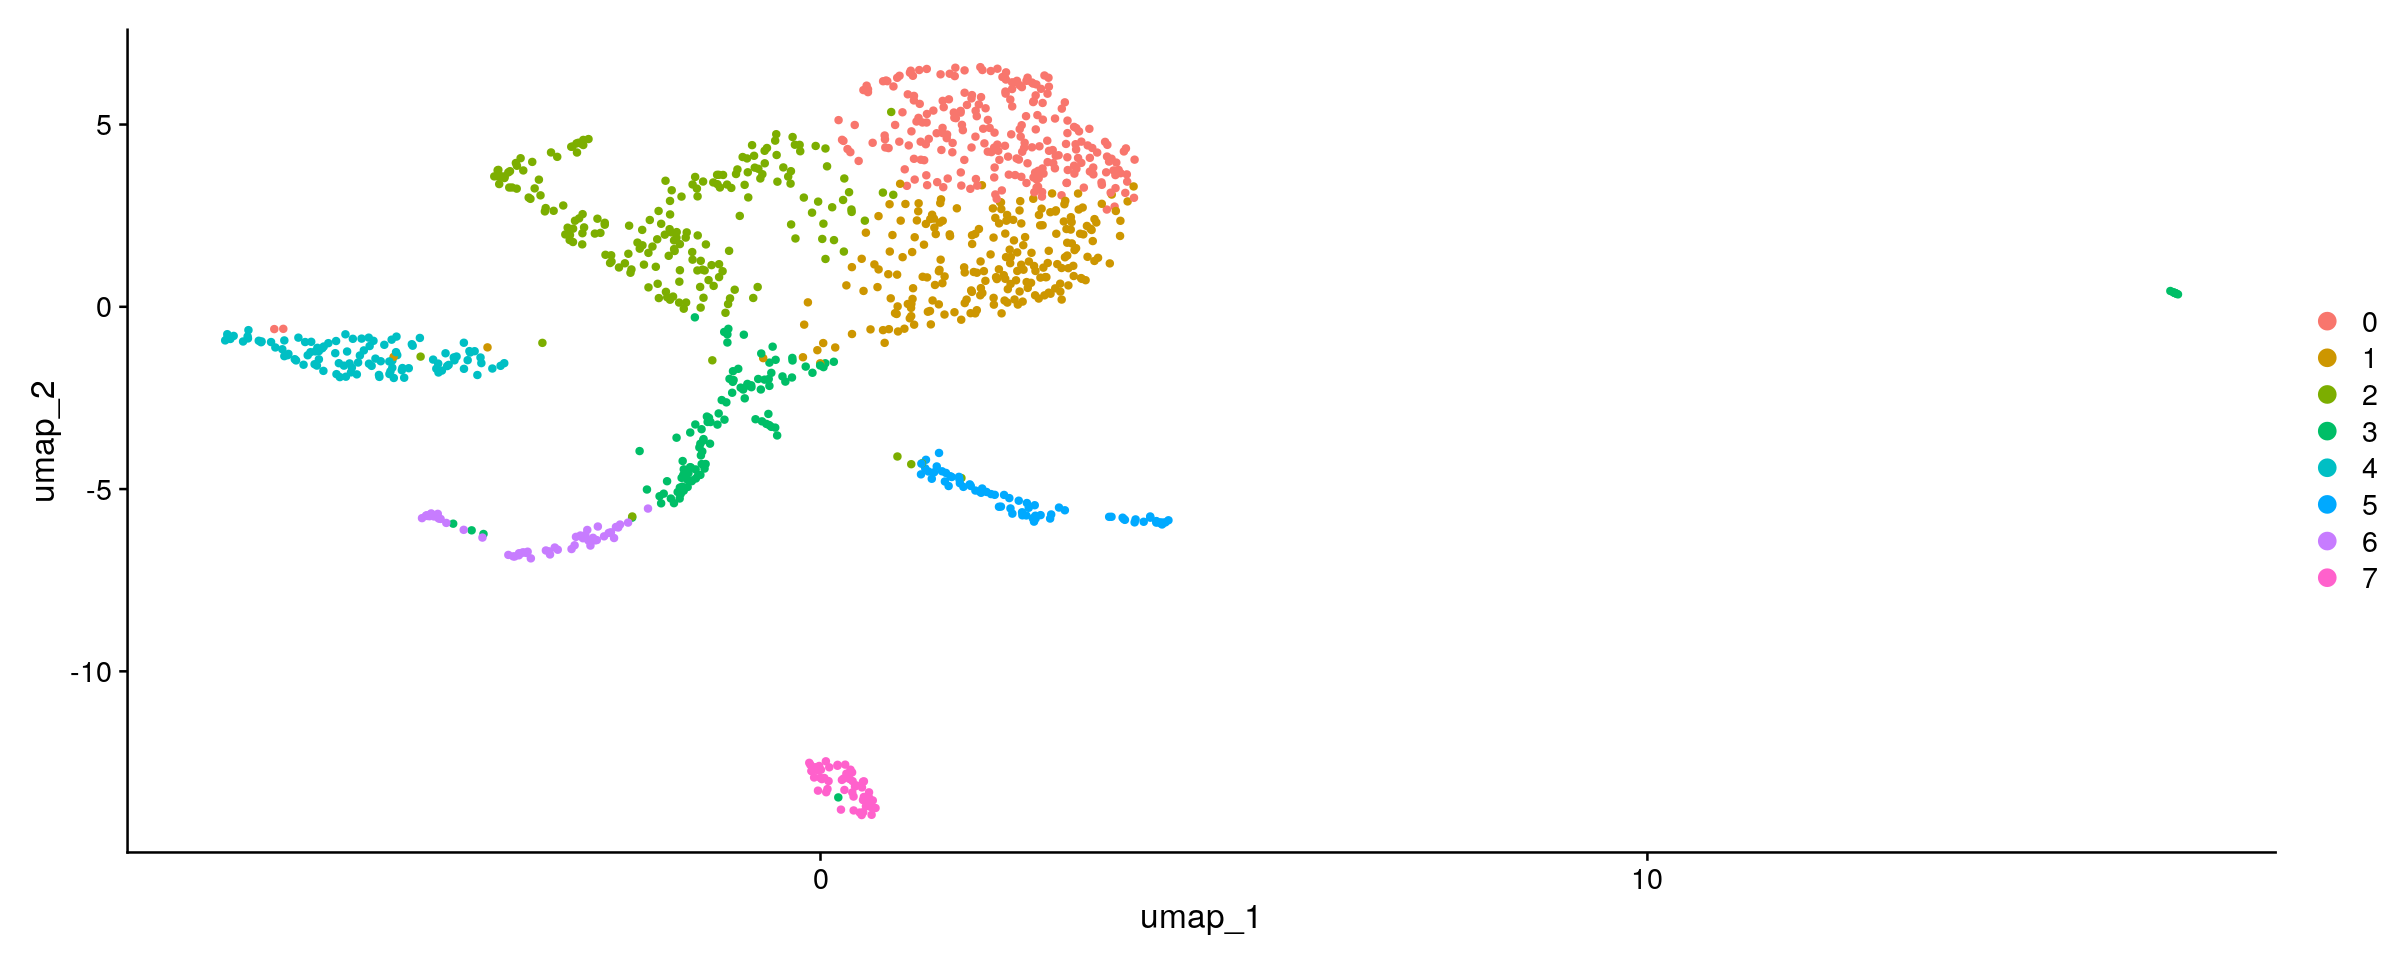

# **4. Identify specific genes**
### *Total Questions: 1*
### *Total Points: 50*


---

<div class="alert alert-block alert-warning">
    <h3>4. Identify highly variable genes</h3>
    <p>For these highly variable genes (select 3-4 genes), investigate if gene expression values are variable between identified clusters (plot (RStudio) and show violin plots here) </p>
</div>

In [ ]:
### Add cells for R code, comments and figures (using markdown) to keep in mind.

#Identify the 4 most highly variable genes

top4 <- head(VariableFeatures(pbmc), 4)
print(top4)

#find markers for every cluster compared to all remaining cells, report only the significant ones

pbmc.markers <- FindAllMarkers(pbmc, only.pos = TRUE)
pbmc.markers %>%
  group_by(cluster) %>%
  dplyr::filter(avg_log2FC > 1)

#you can plot raw counts as well

VlnPlot(pbmc, features = c("S100A9", "S100A8", "GNLY", "IGKC"), slot = "counts", log = TRUE)

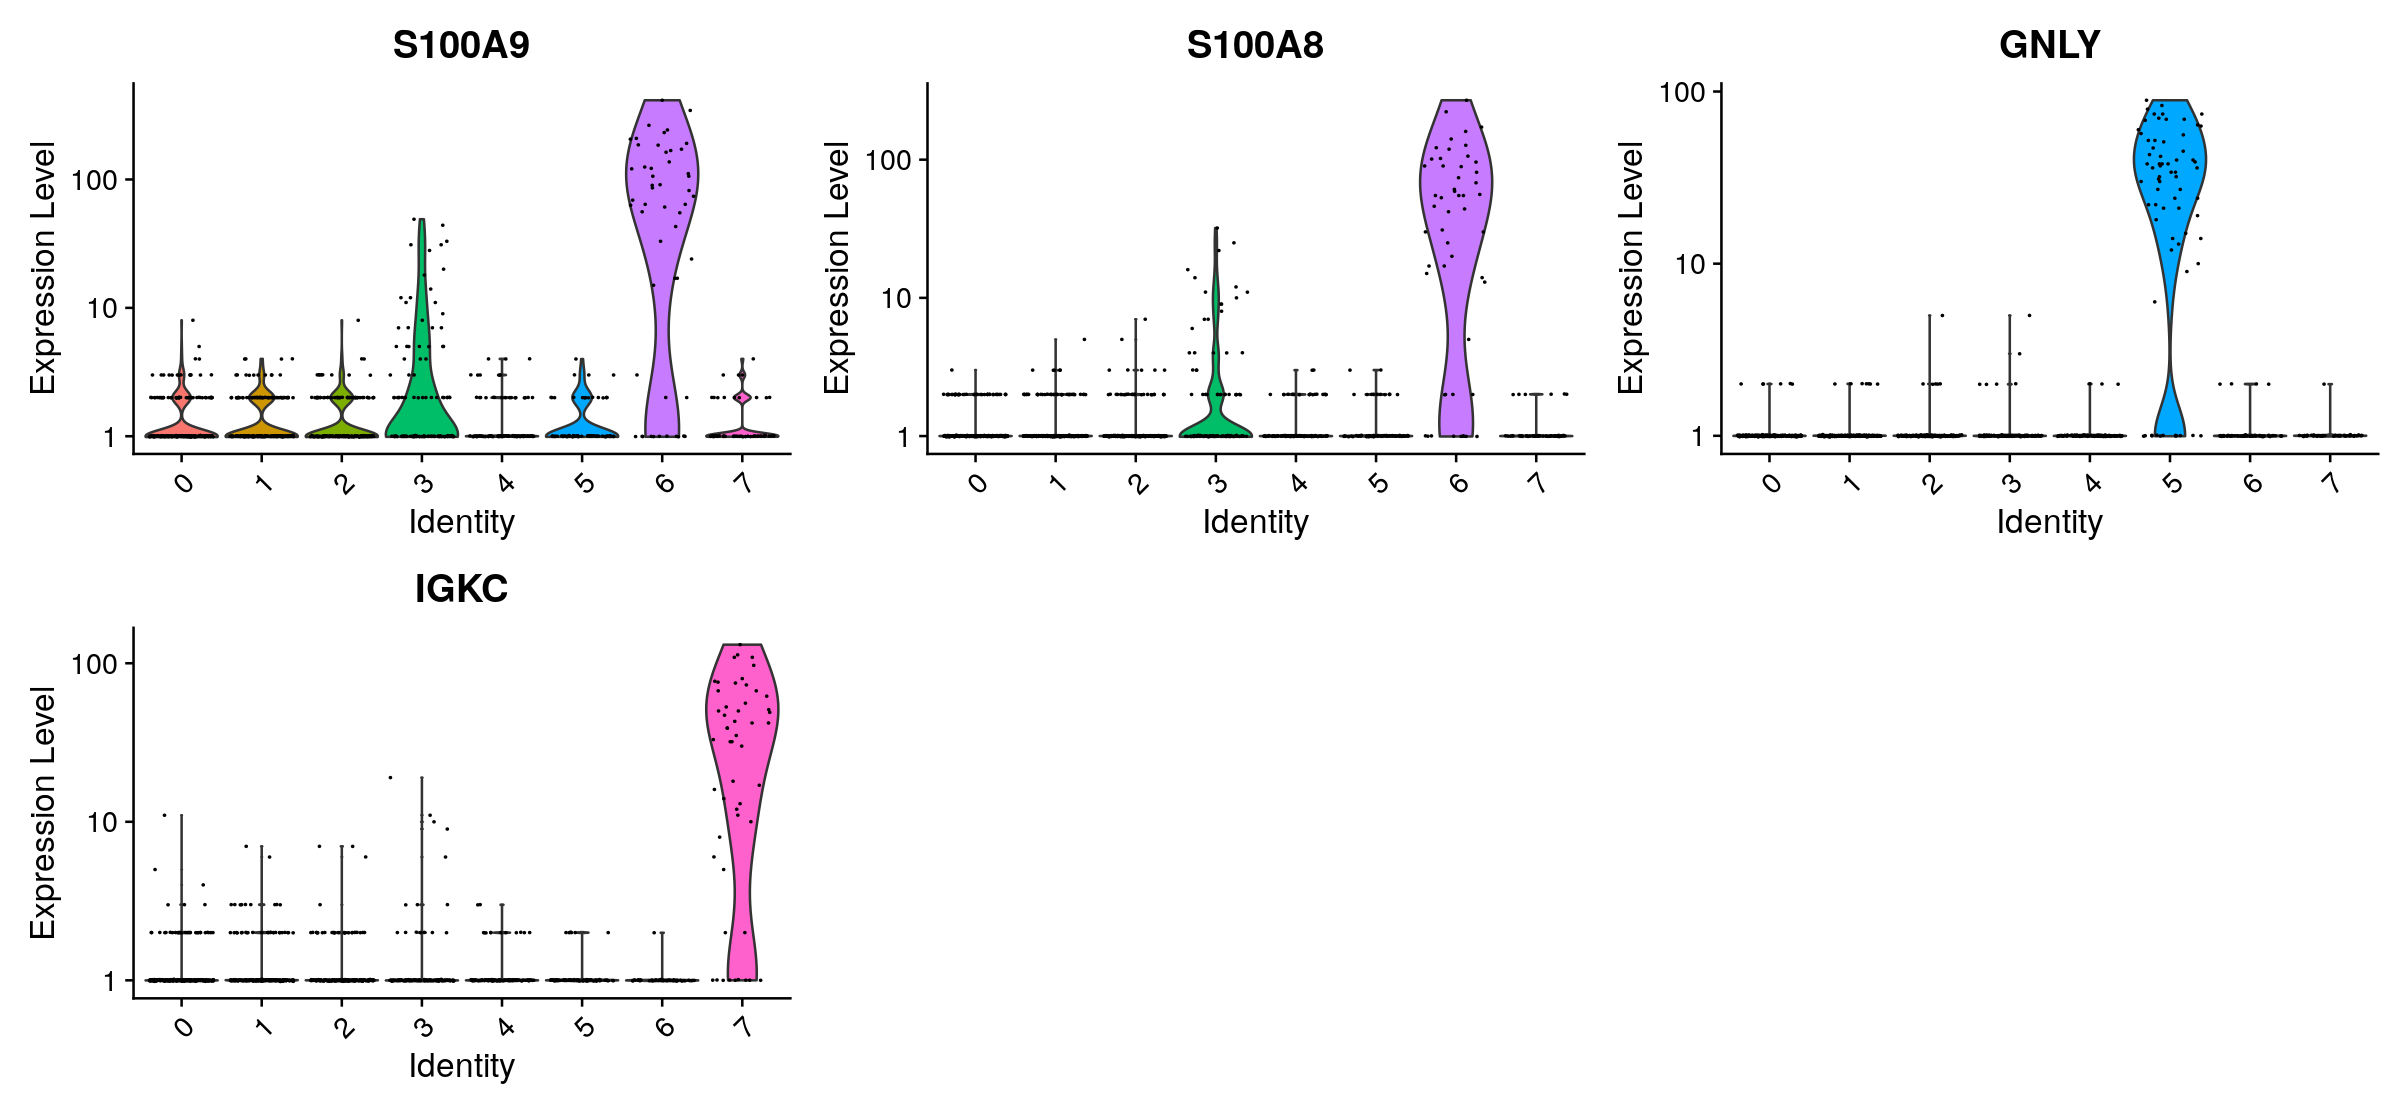

Gene Descriptions:
S100A9 (S100 Calcium Binding Protein A9): S100A9 is involved in the regulation of a number of cellular processes such as cell cycle progression and differentiation. It plays a significant role in the immune response, particularly in the function of neutrophils. The protein encoded by S100A9 can form a complex with the protein encoded by S100A8, and this complex is involved in inflammatory processes.

S100A8 (S100 Calcium Binding Protein A8): S100A8 is involved in many of the same processes as S100A9. The S100A8/S100A9 complex (also known as calprotectin) has antimicrobial properties and is used as a marker for inflammation. The complex can be found at 
high levels in certain inflammatory conditions, including various types of infections and autoimmune disorders.

GNLY(Granulysin): Granulysin is found in the granules of cytotoxic T cells and natural killer (NK) cells. It has antimicrobial activities and is part of the immune system's defense against a broad range of microorganisms, including bacteria, fungi, and parasites. Additionally, granulysin can induce apoptosis in various types of tumor cells, making it a subject of interest in cancer research.

IGKC (Immunoglobulin Kappa Constant):The IGKC gene encodes one of the several constant regions of the kappa light chains of antibodies (immunoglobulins). The specific role of IGKC is in the final assembly and function of the kappa-type immunoglobulins.

Although all of the genes had highly variable expression values, it appears that GNLY is more likely to be highly expressed or very lowly expressed. This is shown by the the slim area in the violin plot reprsenting moderate expression level values. 